# CleanTechTag 
## (Clean Technologies Tagging) - Data Analysis
---

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
data_funding = pd.read_csv('datasets/cleantechtag_joint_results.csv') #only once is need

In [23]:
data_funding.head()

,Unnamed: 0,rcn,id,acronym,status,programme,topics,frameworkProgramme,title,startDate,endDate,projectUrl,objective,totalCost,ecMaxContribution,call,fundingScheme,coordinator,coordinatorCountry,participants,participantCountries,subjects
0,6,225983,875629,NAIMA,SIGNED,H2020-EU.2.1.3.;H2020-EU.2.1.2.,LC-BAT-2-2019,H2020,NA ION MATERIALS AS ESSENTIAL COMPONENTS TO MA...,2019-12-01,2022-11-30,NaN,The EU is transitioning to The EU is transitio...,7999897.03,7999897.03,H2020-LC-BAT-2019,RIA,TIAMAT,FR,BIOKOL SVERIGE AB;VLAAMSE INSTELLING VOOR TECH...,SE;BE;BG;ES;FR;NL;DE;SI,NaN
1,32,226246,870245,GEOCEP,SIGNED,H2020-EU.1.3.3.,MSCA-RISE-2019,H2020,Global Excellence in Modeling Climate and Ener...,2020-10-01,2024-09-30,NaN,The global GEOCEP project provides an innovati...,3036000.00,2254000.00,H2020-MSCA-RISE-2019,MSCA-RISE,UNIVERZITA KARLOVA,CZ,LONDON SCHOOL OF ECONOMICS AND POLITICAL SCIEN...,UK;CH;IT;FR,NaN
2,39,226082,887865,SAAT2020,SIGNED,H2020-EU.3.;H2020-EU.2.3.;H2020-EU.2.1.,EIC-SMEInst-2018-2020,H2020,Scoring crops with Agricultural Artificial int...,2019-12-01,2020-05-31,NaN,"By 2050, our planet will be home to more than ...",71429.00,50000.00,H2020-SMEInst-2018-2020-1,SME-1,COMPUTOMICS GMBH,DE,NaN,NaN,NaN
3,40,226019,889249,BTSys,SIGNED,H2020-EU.3.;H2020-EU.2.3.;H2020-EU.2.1.,EIC-SMEInst-2018-2020,H2020,Biosolids treatment system for transformation ...,2019-11-01,2020-02-29,NaN,Global annual organic waste generation is set ...,71429.00,50000.00,H2020-SMEInst-2018-2020-1,SME-1,AGRISTARBIO - ENVIRONMENTAL SOLUTIONS LDA,PT,NaN,NaN,NaN
4,53,225952,888396,Green-Insulation,SIGNED,H2020-EU.3.;H2020-EU.2.3.;H2020-EU.2.1.,EIC-SMEInst-2018-2020,H2020,Green-Tech Fibre Insulation,2019-12-01,2020-05-31,NaN,Miljøskærm is a Danish SME having independentl...,71429.00,50000.00,H2020-SMEInst-2018-2020-1,SME-1,MILJOSKAERM APS,DK,NaN,NaN,NaN


In [24]:
data_funding.startDate = pd.to_datetime(data_funding.startDate)

In [25]:
data_funding['First_year'] = pd.DatetimeIndex(data_funding['startDate']).year

In [26]:
len(data_funding)

1732

---

### Demanded technologies

In [27]:
catalogue = pd.read_csv('datasets/cleantechtag_catalogue.csv')

In [28]:
sector_counts = pd.pivot_table(
    catalogue,
    index='id',
    columns='sector',
    aggfunc='count',
    fill_value=0)['category'].reset_index()

In [29]:
sector_counts.head(3)

sector,id,Agriculture,Buildings,Energy,Human settlements,Industry,Transport
0,633192,0,1,0,1,0,0
1,633962,0,0,0,1,1,0
2,635201,1,0,0,0,0,0


### Cost analysis (Calculating EU contribution)

In [30]:
data_funding = pd\
    .merge(data_funding, sector_counts,
             how='left', on='id')\
    .sort_values(['startDate','ecMaxContribution'], ascending=False)\
    .reset_index()

In [31]:
data_funding.head(3)

,index,Unnamed: 0,rcn,id,acronym,status,programme,topics,frameworkProgramme,title,startDate,endDate,projectUrl,objective,totalCost,ecMaxContribution,call,fundingScheme,coordinator,coordinatorCountry,participants,participantCountries,subjects,First_year,Agriculture,Buildings,Energy,Human settlements,Industry,Transport
0,1,32,226246,870245,GEOCEP,SIGNED,H2020-EU.1.3.3.,MSCA-RISE-2019,H2020,Global Excellence in Modeling Climate and Ener...,2020-10-01,2024-09-30,NaN,The global GEOCEP project provides an innovati...,3036000.00,2254000.00,H2020-MSCA-RISE-2019,MSCA-RISE,UNIVERZITA KARLOVA,CZ,LONDON SCHOOL OF ECONOMICS AND POLITICAL SCIEN...,UK;CH;IT;FR,NaN,2020,0.0,0.0,0.0,0.0,1.0,0.0
1,352,5141,222703,838508,THERM,SIGNED,H2020-EU.1.3.2.,MSCA-IF-2018,H2020,Transport of Heat in hEteRogeneous Media,2020-09-01,2022-08-31,NaN,Geothermal represents a promising energy sourc...,196707.84,196707.84,H2020-MSCA-IF-2018,MSCA-IF-EF-ST,UNIVERSITE DE RENNES I,FR,NaN,NaN,NaN,2020,0.0,0.0,1.0,0.0,0.0,0.0
2,367,5410,222176,840222,FracTAlS,SIGNED,H2020-EU.1.3.2.,MSCA-IF-2018,H2020,High Cycle Fatigue Cracking of Meso- and Micro...,2020-09-01,2022-08-31,NaN,The aim of FracTAlS is to increase the underst...,191149.44,191149.44,H2020-MSCA-IF-2018,MSCA-IF-EF-ST,EIDGENOSSISCHE MATERIALPRUFUNGS- UND FORSCHUNG...,CH,NaN,NaN,NaN,2020,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
######

In [33]:
data_funding['Count'] = 1
data_funding['agricultur_fund'] = np.where((data_funding['Agriculture']==0), 0,1)
data_funding['agricultur_fund_yes'] = np.where((data_funding['Agriculture']==0), "no", "yes")

# funding per year

#### all funding + agricultural fund per year

Text(0.5, 1.0, 'Number of agriculture and other projects per year')

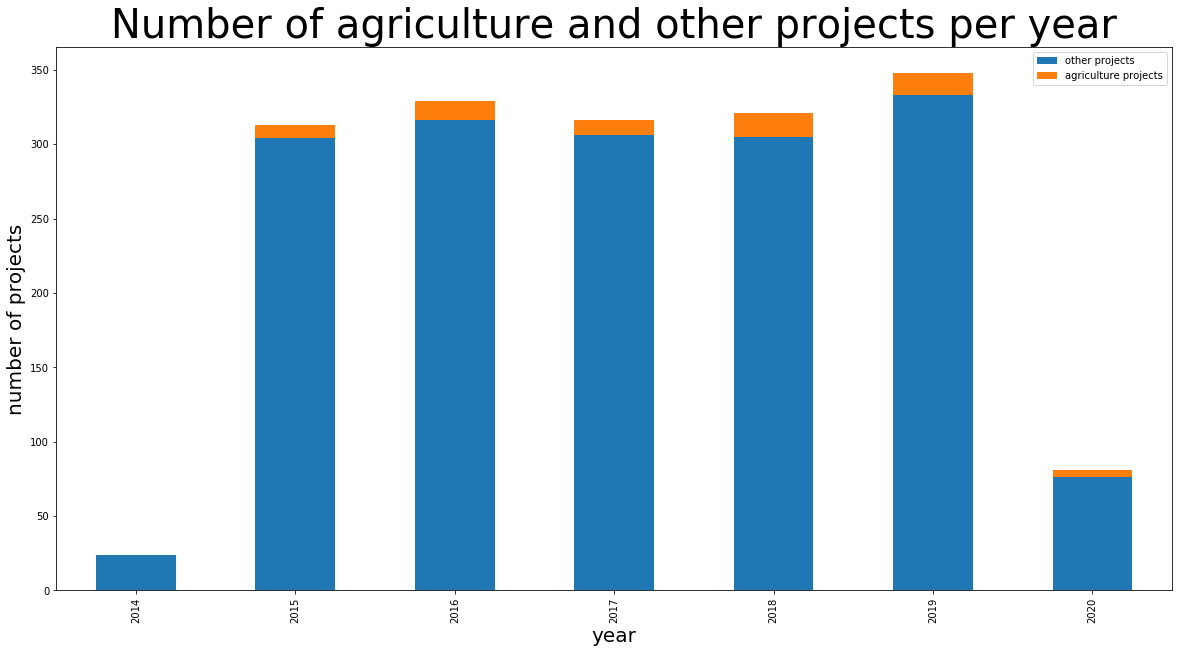

In [34]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10 # changes the dimensions of the plot (width, height)

data_funding.groupby(['First_year','agricultur_fund_yes']).size().unstack().plot(kind='bar',stacked=True)

plt.xlabel('year', fontsize = 20)
plt.ylabel('number of projects', fontsize = 20)
L=plt.legend()
L.get_texts()[0].set_text('other projects')
L.get_texts()[1].set_text('agriculture projects')
plt.title('Number of agriculture and other projects per year', fontsize = 40)

#plt.savefig('Graphics/Funding_total_divided_per_year.png', bbox_inches = "tight") # "tight" ensures that the whole labels are shown in the plot


#### all funding + agricultural funding per year (ABSOLUTE VALUES, counts)

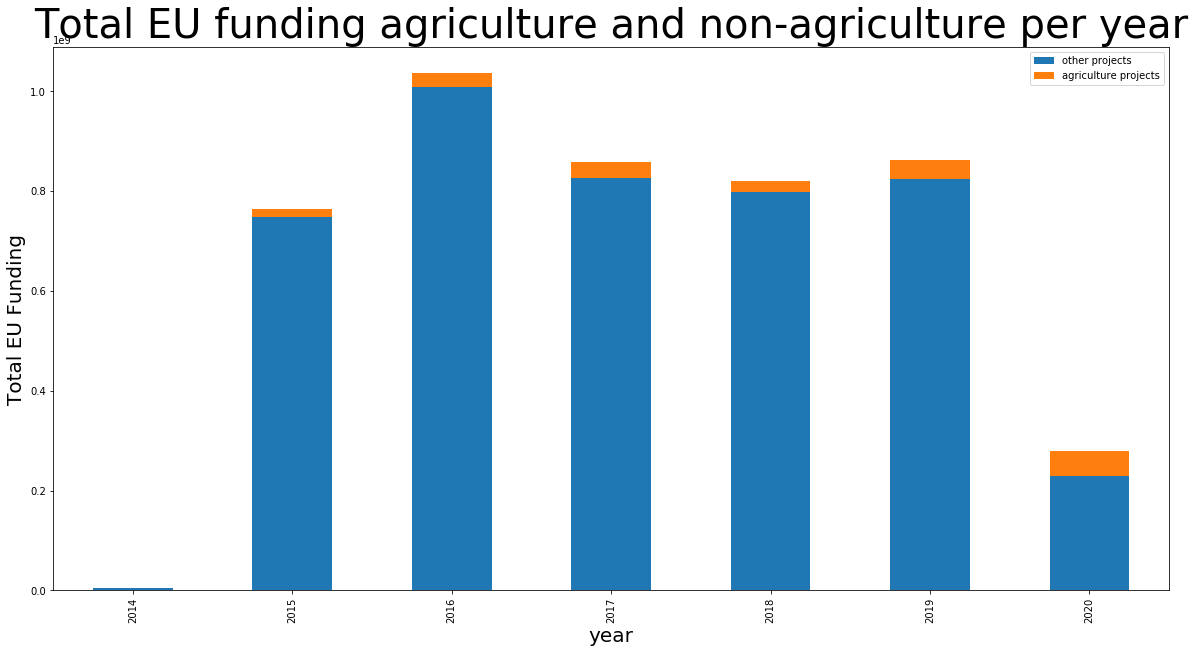

In [35]:
rcParams['figure.figsize'] = 20, 10 # changes the dimensions of the plot (width, height)

data_funding.groupby(['First_year','agricultur_fund_yes']).agg({'ecMaxContribution':'sum'}).unstack().plot(kind='bar',stacked=True)

plt.xlabel('year', fontsize = 20)
plt.ylabel('Total EU Funding', fontsize = 20)
L=plt.legend()
L.get_texts()[0].set_text('other projects')
L.get_texts()[1].set_text('agriculture projects')
plt.title('Total EU funding agriculture and non-agriculture per year', fontsize = 40)

plt.savefig('graphics/Funding_total_divided_per_year_absolut.png', bbox_inches = "tight") # "tight" ensures that the whole labels are shown in the plot

#### all funding + agricultural funding per year (PERCENTAGES)

In [36]:
pd.set_option('display.max_columns', None)
data_funding.head()

,index,Unnamed: 0,rcn,id,acronym,status,programme,topics,frameworkProgramme,title,startDate,endDate,projectUrl,objective,totalCost,ecMaxContribution,call,fundingScheme,coordinator,coordinatorCountry,participants,participantCountries,subjects,First_year,Agriculture,Buildings,Energy,Human settlements,Industry,Transport,Count,agricultur_fund,agricultur_fund_yes
0,1,32,226246,870245,GEOCEP,SIGNED,H2020-EU.1.3.3.,MSCA-RISE-2019,H2020,Global Excellence in Modeling Climate and Ener...,2020-10-01,2024-09-30,NaN,The global GEOCEP project provides an innovati...,3036000.00,2254000.00,H2020-MSCA-RISE-2019,MSCA-RISE,UNIVERZITA KARLOVA,CZ,LONDON SCHOOL OF ECONOMICS AND POLITICAL SCIEN...,UK;CH;IT;FR,NaN,2020,0.0,0.0,0.0,0.0,1.0,0.0,1,0,no
1,352,5141,222703,838508,THERM,SIGNED,H2020-EU.1.3.2.,MSCA-IF-2018,H2020,Transport of Heat in hEteRogeneous Media,2020-09-01,2022-08-31,NaN,Geothermal represents a promising energy sourc...,196707.84,196707.84,H2020-MSCA-IF-2018,MSCA-IF-EF-ST,UNIVERSITE DE RENNES I,FR,NaN,NaN,NaN,2020,0.0,0.0,1.0,0.0,0.0,0.0,1,0,no
2,367,5410,222176,840222,FracTAlS,SIGNED,H2020-EU.1.3.2.,MSCA-IF-2018,H2020,High Cycle Fatigue Cracking of Meso- and Micro...,2020-09-01,2022-08-31,NaN,The aim of FracTAlS is to increase the underst...,191149.44,191149.44,H2020-MSCA-IF-2018,MSCA-IF-EF-ST,EIDGENOSSISCHE MATERIALPRUFUNGS- UND FORSCHUNG...,CH,NaN,NaN,NaN,2020,0.0,0.0,0.0,0.0,1.0,0.0,1,0,no
3,306,4416,223821,846498,CONGO_WHALEBOATS,SIGNED,H2020-EU.1.3.2.,MSCA-IF-2018,H2020,Whaleboats in the Forest: Subaltern Technologi...,2020-09-01,2022-08-31,NaN,Congo’s wooden baleinières (Fr. whaleboats) ar...,178320.00,178320.00,H2020-MSCA-IF-2018,MSCA-IF-EF-RI,KATHOLIEKE UNIVERSITEIT LEUVEN,BE,NaN,NaN,NaN,2020,0.0,0.0,0.0,1.0,0.0,0.0,1,0,no
4,375,5586,222696,838179,LABandFAB,SIGNED,H2020-EU.1.3.2.,MSCA-IF-2018,H2020,Enabling the scalable and cheap production of ...,2020-09-01,2022-08-31,NaN,The reduction of greenhouse emissions is curre...,171473.28,171473.28,H2020-MSCA-IF-2018,MSCA-IF-EF-SE,ENI SPA,IT,NaN,NaN,NaN,2020,0.0,0.0,1.0,0.0,0.0,0.0,1,0,no


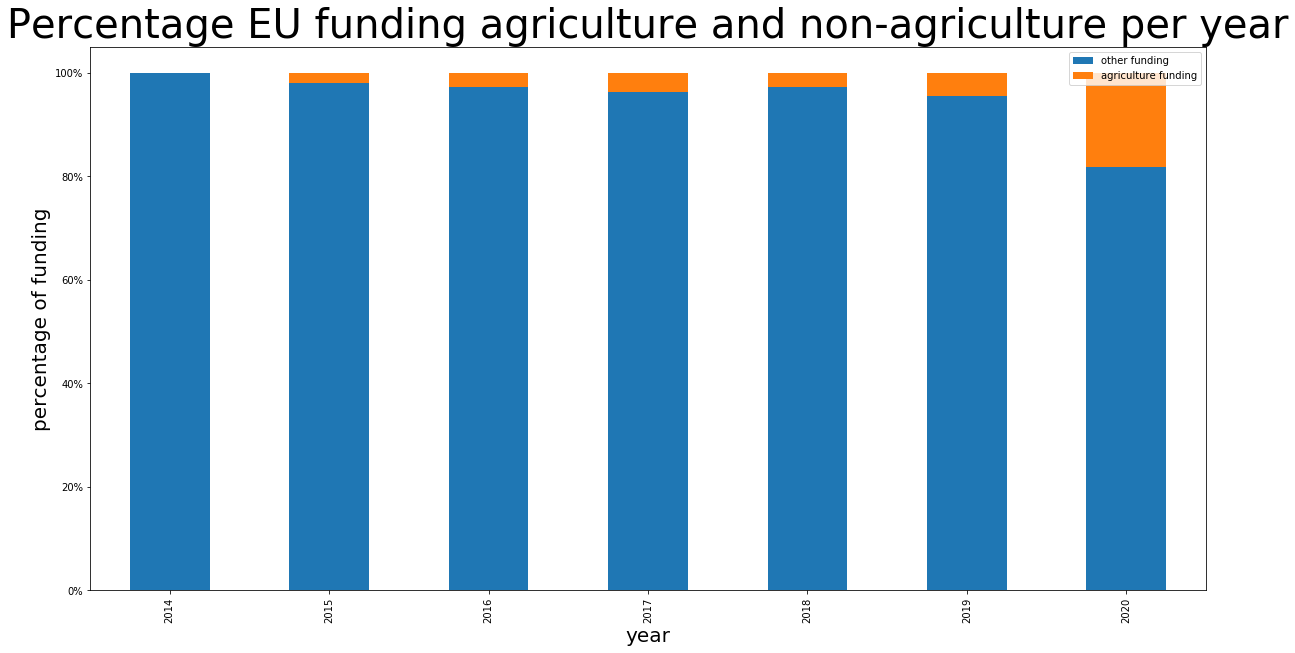

In [37]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

rcParams['figure.figsize'] = 20, 10 # changes the dimensions of the plot (width, height)

data_funding.groupby(['First_year','agricultur_fund_yes']).agg({'ecMaxContribution':'sum'}).groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.xlabel('year', fontsize = 20)
plt.ylabel('percentage of funding', fontsize = 20)
L=plt.legend()
L.get_texts()[0].set_text('other funding')
L.get_texts()[1].set_text('agriculture funding')
plt.title('Percentage EU funding agriculture and non-agriculture per year', fontsize = 40)


plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig('Graphics/Funding_total_divided_per_year_percentage.png', bbox_inches = "tight") # "tight" ensures that the whole labels are shown in the plot

In [54]:
# aggregate
Percentage = data_funding[['First_year', 'Count', 'agricultur_fund','ecMaxContribution']].copy()
Percentage = Percentage[Percentage["agricultur_fund"]==1]
Percentage=Percentage.groupby(['First_year','agricultur_fund']).sum() # aggregate the data by country
# Percentage['agriculture_fund_percentage'] = (Percentage['agricultur_fund'] / Percentage ['Count']) * 100
# Percentage['other_fund_percentage'] = 100 - Percentage['agriculture_fund_percentage']

# add percentage change
AgriFund = Percentage['ecMaxContribution'].tolist()
AgriFund
agriculture_fund_percentage_change = []
for x in range(1, len(AgriFund), 1):
    val_1 = AgriFund[x-1]
    if val_1 == 0.0: #Check if val_1 is 0.
        agriculture_fund_percentage_change.append('nan')
    else:
        val_2 = AgriFund[x]
        diff = int(round((float(val_2)/val_1)*100)) # change to float -->round--> int
        agriculture_fund_percentage_change.append(diff)
agriculture_fund_percentage_change.insert(0,'nan')
    
Percentage['agriculture_fund_percentage_change'] = agriculture_fund_percentage_change

Percentage.head(30)

,,Count,ecMaxContribution,agriculture_fund_percentage_change
First_year,agricultur_fund,,,
2015,1,9,15483491.75,nan
2016,1,13,28027661.82,181
2017,1,10,31735790.60,113
2018,1,16,22360338.41,70
2019,1,15,38093298.19,170
2020,1,5,50884380.98,134
